<a href="https://colab.research.google.com/github/krishgit042023/GOOGLE-Stock-Price-prediction-using-RNN/blob/main/GOOGLE_stock_price_(RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing datasets**

In [ ]:
# prompt: import numpy pandas matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**import the dataset**

In [ ]:
# prompt: load the train data

import pandas as pd
dataset = pd.read_csv('/content/Google_Stock_Price_Train.csv')

dataset.head()


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
data = dataset.iloc[:, 1:2].values
data

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

**feature scaling**

In [ ]:
# prompt: apply features scaling

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
data_scaled = sc.fit_transform(data)
data_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

**creating a data structure with 60 timesteps and 1 output**

In [ ]:
# prompt: create a data structure with 60 timesteps and 1 output

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(data_scaled[i-60:i, 0])
    y_train.append(data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [ ]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

**reshaping**

In [ ]:
# prompt: reshape the X_train

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

# **Building the RNN**

**importing keras libraries and packages**

In [ ]:
# prompt: importing keras libraries and packages for RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

**initializing the rnn**

In [ ]:
Regressor = Sequential()

**adding first LSTM layer and some Dropout regularization(dropping some neurons)**

In [ ]:
Regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
Regressor.add(Dropout(0.2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# prompt: add second LSTM layer and Dropout regularization

# Adding a second LSTM layer and some Dropout regularization
Regressor.add(LSTM(units = 50, return_sequences = True))
Regressor.add(Dropout(0.2))

In [ ]:
# prompt: add third LSTM layer and Dropout regularization

# Adding a third LSTM layer and some Dropout regularization
Regressor.add(LSTM(units = 50, return_sequences = True))
Regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularization
Regressor.add(LSTM(units = 50))
Regressor.add(Dropout(0.2))

**adding the output layer**

In [ ]:
# Adding the output layer
Regressor.add(Dense(units = 1))

**Compiling the RNN**

In [ ]:
# Compiling the RNN
Regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

**Fitting the RNN to the Training set**

In [ ]:
# Fitting the RNN to the Training set
Regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 144ms/step - loss: 0.0768
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.0066
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - loss: 0.0065
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - loss: 0.0057
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - loss: 0.0054
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 0.0054
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 153ms/step - loss: 0.0048
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - loss: 0.0052
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - loss: 0.0047
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - loss: 0.0044
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - loss: 0.0046
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - loss: 0.0040
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - loss: 0.0051
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 148ms/step - loss: 0.0038
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 

# **Making the predictions and visualizing the results**

**getting the real stock price of 2017**

In [ ]:
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')

dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [ ]:
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price.shape
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

**getting the predicted stock price of 2017**

In [ ]:
# prompt: concatenate dataset(train) and dataset_test(test), only open column

# Concatenate 'Open' columns from training and test datasets
combined_open = pd.concat([dataset['Open'], dataset_test['Open']], axis=0)
combined_open

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
15,829.62
16,837.81
17,834.71
18,814.66


In [ ]:
# prompt: find the lower bound of prediction

# Getting the predicted stock price of 2017
inputs = combined_open[len(combined_open) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = Regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [ ]:
predicted_stock_price

array([[787.20825],
       [784.2942 ],
       [784.86584],
       [786.33594],
       [789.6196 ],
       [795.5334 ],
       [800.6496 ],
       [802.2783 ],
       [802.45575],
       [802.52454],
       [802.68286],
       [802.62384],
       [802.4591 ],
       [803.00104],
       [803.92114],
       [808.9045 ],
       [816.0235 ],
       [823.2312 ],
       [826.5398 ],
       [821.2929 ]], dtype=float32)

In [ ]:
# Calculate the lower bound of the prediction (e.g., 95% confidence interval)
# Assuming the prediction errors are normally distributed, you can use standard deviation
# to estimate the lower bound.  This requires more sophisticated error analysis.
# The code below is a placeholder and needs more error analysis to be accurate

# Placeholder for a more robust error analysis.  Replace with your method of choice.
prediction_errors = abs(predicted_stock_price - real_stock_price)
std_dev_error = np.std(prediction_errors)#

# Example: 95% confidence interval (assuming normal distribution)
lower_bound = predicted_stock_price - 1.96 * std_dev_error

lower_bound

array([[773.4637 ],
       [770.5496 ],
       [771.1213 ],
       [772.5914 ],
       [775.87506],
       [781.7888 ],
       [786.905  ],
       [788.53375],
       [788.7112 ],
       [788.77997],
       [788.9383 ],
       [788.8793 ],
       [788.71454],
       [789.2565 ],
       [790.1766 ],
       [795.1599 ],
       [802.27893],
       [809.48663],
       [812.7952 ],
       [807.54834]], dtype=float32)

**visualizing the results**

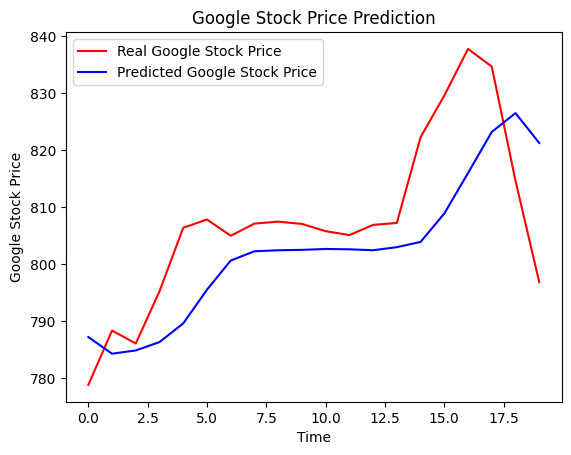

In [ ]:
# prompt: visualize the real_stock_price and predicted_stock_price

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

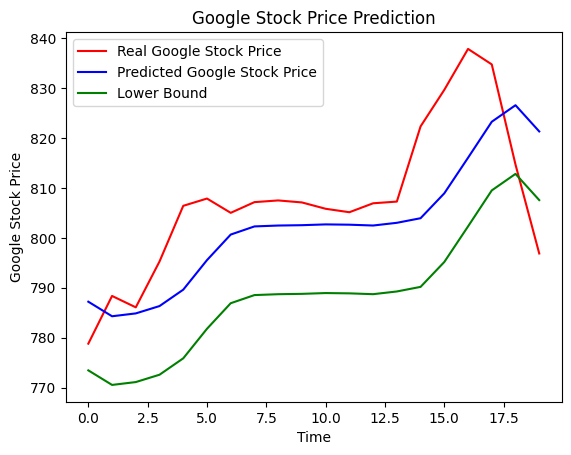

In [ ]:
# prompt: visualize the real_stock_price and lower_bound

# Visualising the results with lower bound
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.plot(lower_bound, color = 'green', label = 'Lower Bound') #Plot the lower bound
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()